## Collect results for benchmarking

In [7]:
import glob
import pandas as pd

# root = "./result"
root = "../../../Desktop/iclr/result"
dfs = []
for f in sorted(glob.glob(f"{root}/SBM/*.csv")):
    df = pd.read_csv(f)
    dfs.append(df)

sbm_df = pd.concat(dfs, axis=0)

dfs = []
for f in sorted(glob.glob(f"{root}/InterpGN/*.csv")):
    df = pd.read_csv(f)
    dfs.append(df)

hybrid_df = pd.concat(dfs, axis=0)


dfs = []
for f in sorted(glob.glob(f"{root}/DNN/*.csv")):
    df = pd.read_csv(f)
    dfs.append(df)

dnn_df = pd.concat(dfs, axis=0)
dnn_df.shape


sbm_df.shape, hybrid_df.shape, dnn_df.shape, sbm_df.columns, hybrid_df.columns, dnn_df.columns

((4200, 28),
 (5380, 28),
 (444, 15),
 Index(['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
        'num_shapelet', 'gating_value', 'pos_weight', 'beta_schedule', 'lr',
        'train_epochs', 'seed', 'test_accuracy', 'epoch_stop', 'eta_mean',
        'eta_std', 'eta_count', 'shapelet_score', 'w_sum_10', 'w_mean_10',
        'w_sum_5', 'w_mean_5', 'w_sum_1', 'w_mean_1', 'w_max', 'w_gini_clip',
        'w_gini_abs'],
       dtype='object'),
 Index(['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
        'num_shapelet', 'gating_value', 'pos_weight', 'beta_schedule', 'lr',
        'train_epochs', 'seed', 'test_accuracy', 'epoch_stop', 'eta_mean',
        'eta_std', 'eta_count', 'shapelet_score', 'w_sum_10', 'w_mean_10',
        'w_sum_5', 'w_mean_5', 'w_sum_1', 'w_mean_1', 'w_max', 'w_gini_clip',
        'w_gini_abs'],
       dtype='object'),
 Index(['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
        'num_shapelet

In [8]:
import pandas as pd

hybrid_df = hybrid_df.drop_duplicates(subset=['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
       'num_shapelet', 'gating_value', 'beta_schedule', 'lr',
       'train_epochs', 'seed'])

dnn_df = dnn_df.drop_duplicates(subset=['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
       'num_shapelet', 'gating_value', 'pos_weight', 'beta_schedule', 'lr',
       'train_epochs', 'seed'])

sbm_df.shape, hybrid_df.shape, dnn_df.shape, sbm_df.columns, hybrid_df.columns, dnn_df.columns

((4200, 28),
 (5250, 28),
 (440, 15),
 Index(['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
        'num_shapelet', 'gating_value', 'pos_weight', 'beta_schedule', 'lr',
        'train_epochs', 'seed', 'test_accuracy', 'epoch_stop', 'eta_mean',
        'eta_std', 'eta_count', 'shapelet_score', 'w_sum_10', 'w_mean_10',
        'w_sum_5', 'w_mean_5', 'w_sum_1', 'w_mean_1', 'w_max', 'w_gini_clip',
        'w_gini_abs'],
       dtype='object'),
 Index(['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
        'num_shapelet', 'gating_value', 'pos_weight', 'beta_schedule', 'lr',
        'train_epochs', 'seed', 'test_accuracy', 'epoch_stop', 'eta_mean',
        'eta_std', 'eta_count', 'shapelet_score', 'w_sum_10', 'w_mean_10',
        'w_sum_5', 'w_mean_5', 'w_sum_1', 'w_mean_1', 'w_max', 'w_gini_clip',
        'w_gini_abs'],
       dtype='object'),
 Index(['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
        'num_shapelet

In [9]:
def get_sub_df(df, lambda_reg=None, lambda_div=None, epsilon=None, gating_value=None, num_shapelet=None, beta_schedule=None):
    '''
    Retrieve a subset of selected results with given hyperparameters.
    '''
    sub_df = df
    if lambda_reg is not None:
        idx = sub_df['lambda_reg'] == lambda_reg
        sub_df = sub_df.loc[idx]
    if lambda_div is not None:
        idx = sub_df['lambda_div'] == lambda_div
        sub_df = sub_df.loc[idx]
    if epsilon is not None:
        idx = sub_df['epsilon'] == epsilon
        sub_df = sub_df.loc[idx]
    if gating_value is not None:
        idx = sub_df['gating_value'] == gating_value
        sub_df = sub_df.loc[idx]
    if num_shapelet is not None:
        idx = sub_df['num_shapelet'] == num_shapelet
        sub_df = sub_df.loc[idx]
    if beta_schedule is not None:
        idx = sub_df['beta_schedule'] == beta_schedule
        sub_df = sub_df.loc[idx]
    return sub_df

#### Base cases

Number of shapelets $K$ = 10 \
L1 regularization $\lambda_{\text{reg}}$ = 0.1 \
Diversity regularization $\lambda_{\text{div}}$ = 0.1 \
Epsilon $\epsilon$ = 1 \
Gating value $g$ = 1


In [10]:
sbm_10_df = get_sub_df(sbm_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1., gating_value=1, num_shapelet=10)
print("SBM results:", sbm_10_df.shape)
grouped = sbm_10_df.groupby(['dataset'])[['test_accuracy']].mean()
sbm_10_df = grouped.reset_index()
sbm_10_df = sbm_10_df.set_index('dataset')

hybrid_10_df = get_sub_df(hybrid_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1., gating_value=1, num_shapelet=10, beta_schedule='constant')
print("InterpGN results:", hybrid_10_df.shape)
grouped = hybrid_10_df.groupby(['dataset'])[['test_accuracy']].mean()
hybrid_10_df = grouped.reset_index()
hybrid_10_df = hybrid_10_df.set_index('dataset')

df = pd.concat([sbm_10_df, hybrid_10_df], axis=1)
mean_row = df.mean()
df.loc['Average'] = mean_row

sbm_10_df.mean(), hybrid_10_df.mean()


SBM results: (150, 28)
InterpGN results: (150, 28)


(test_accuracy    0.725757
 dtype: float64,
 test_accuracy    0.760072
 dtype: float64)

## Ablation study
#### Number of shapelet

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = get_sub_df(sbm_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1., gating_value=1.)
print(df1.shape)
df1 = df1.groupby(['num_shapelet'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df1 = df1.reset_index()
df1.insert(0, 'model', ['SBM'] * df1.shape[0])

df2 = get_sub_df(hybrid_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1., beta_schedule='constant', gating_value=1.)
print(df2.shape)
df2 = df2.groupby(['num_shapelet'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df2 = df2.reset_index()
df2.insert(0, 'model', ['InterpGN'] * df2.shape[0])

df = pd.concat([df1, df2], axis=0)

print(df.to_latex(index=False, float_format="%.3f"))
df

(300, 28)
(300, 28)
\begin{tabular}{lrrrrrrrrr}
\toprule
model & num_shapelet & test_accuracy & shapelet_score & w_mean_10 & w_mean_5 & w_mean_1 & w_gini_clip & w_gini_abs & eta_mean \\
\midrule
SBM & 5 & 0.720 & 0.103 & 0.050 & 0.144 & 0.523 & 0.722 & 0.460 & NaN \\
SBM & 10 & 0.726 & 0.074 & 0.026 & 0.084 & 0.412 & 0.723 & 0.467 & NaN \\
InterpGN & 5 & 0.761 & 0.079 & 0.034 & 0.109 & 0.429 & 0.685 & 0.422 & 0.405 \\
InterpGN & 10 & 0.760 & 0.061 & 0.014 & 0.060 & 0.343 & 0.679 & 0.420 & 0.441 \\
\bottomrule
\end{tabular}



,model,num_shapelet,test_accuracy,shapelet_score,w_mean_10,w_mean_5,w_mean_1,w_gini_clip,w_gini_abs,eta_mean
0,SBM,5,0.720289,0.103295,0.050225,0.143962,0.523060,0.721981,0.459608,NaN
1,SBM,10,0.725757,0.074055,0.025593,0.083559,0.411686,0.722738,0.466527,NaN
0,InterpGN,5,0.760824,0.079479,0.033517,0.108947,0.428619,0.684831,0.421728,0.404817
1,InterpGN,10,0.760072,0.060813,0.014405,0.059994,0.342773,0.679195,0.419943,0.440834


#### $\beta$ schedule

In [13]:
df1 = get_sub_df(hybrid_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1., gating_value=1., beta_schedule='constant')
print(df1.shape)
df1 = df1.groupby(['num_shapelet'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df1 = df1.reset_index()
df1.insert(0, 'beta', ['constant'] * df1.shape[0])

df2 = get_sub_df(hybrid_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1., gating_value=1., beta_schedule='cosine')
print(df2.shape)
df2 = df2.groupby(['num_shapelet'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df2 = df2.reset_index()
df2.insert(0, 'beta', ['cosine'] * df2.shape[0])

df = pd.concat([df1, df2], axis=0)
print(df.to_latex(index=False, float_format="%.3f"))
df


(300, 28)
(300, 28)
\begin{tabular}{lrrrrrrrrr}
\toprule
beta & num_shapelet & test_accuracy & shapelet_score & w_mean_10 & w_mean_5 & w_mean_1 & w_gini_clip & w_gini_abs & eta_mean \\
\midrule
constant & 5 & 0.761 & 0.079 & 0.034 & 0.109 & 0.429 & 0.685 & 0.422 & 0.405 \\
constant & 10 & 0.760 & 0.061 & 0.014 & 0.060 & 0.343 & 0.679 & 0.420 & 0.441 \\
cosine & 5 & 0.759 & 0.077 & 0.031 & 0.096 & 0.427 & 0.686 & 0.422 & 0.374 \\
cosine & 10 & 0.761 & 0.059 & 0.015 & 0.060 & 0.334 & 0.681 & 0.424 & 0.435 \\
\bottomrule
\end{tabular}



,beta,num_shapelet,test_accuracy,shapelet_score,w_mean_10,w_mean_5,w_mean_1,w_gini_clip,w_gini_abs,eta_mean
0,constant,5,0.760824,0.079479,0.033517,0.108947,0.428619,0.684831,0.421728,0.404817
1,constant,10,0.760072,0.060813,0.014405,0.059994,0.342773,0.679195,0.419943,0.440834
0,cosine,5,0.759265,0.077011,0.031349,0.096391,0.427097,0.686452,0.422324,0.373740
1,cosine,10,0.760551,0.059398,0.015317,0.059714,0.333508,0.680879,0.424337,0.435291


#### $\epsilon$


(750, 28)
(750, 28)


,model,epsilon,test_accuracy,shapelet_score,w_mean_10,w_mean_5,w_mean_1,w_gini_clip,w_gini_abs,eta_mean
0,SBM,0.5,0.715423,0.135969,0.032902,0.089393,0.382638,0.712645,0.446344,NaN
1,SBM,1.0,0.725757,0.074055,0.025593,0.083559,0.411686,0.722738,0.466527,NaN
2,SBM,2.0,0.723335,0.060720,0.028895,0.111203,0.464860,0.758449,0.518625,NaN
3,SBM,5.0,0.585954,0.014915,0.030894,0.063311,0.138415,0.869819,0.732737,NaN
4,SBM,10.0,0.414536,0.012017,0.022975,0.042237,0.071733,0.829203,0.672101,NaN
0,InterpGN,0.5,0.749345,0.087156,0.016102,0.049971,0.250821,0.651567,0.390814,0.310000
1,InterpGN,1.0,0.760072,0.060813,0.014405,0.059994,0.342773,0.679195,0.419943,0.440834
2,InterpGN,2.0,0.759907,0.056972,0.023207,0.097105,0.430522,0.730105,0.477971,0.488152
3,InterpGN,5.0,0.750210,0.013880,0.028895,0.054061,0.136162,0.867985,0.734022,0.262927
4,InterpGN,10.0,0.751674,0.008796,0.024013,0.039749,0.071906,0.836853,0.698752,0.117968


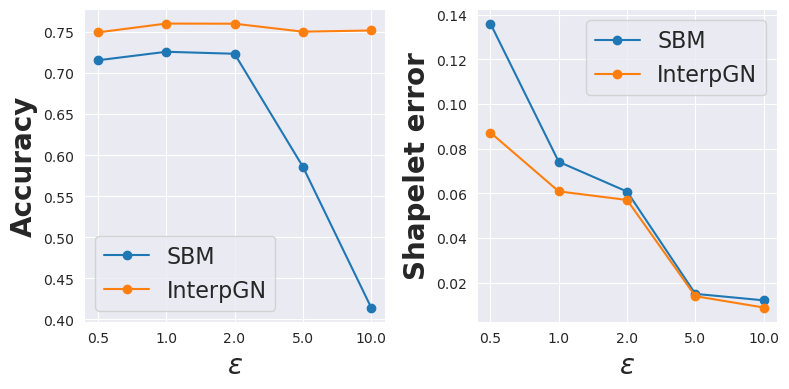

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1 = get_sub_df(sbm_df, lambda_reg=0.1, lambda_div=0.1, num_shapelet=10, gating_value=1.)
print(df1.shape)
df1 = df1.groupby(['epsilon'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df1 = df1.reset_index()
df1 = df1.sort_values(by="epsilon")
df1.insert(0, 'model', ['SBM'] * df1.shape[0])

df2 = get_sub_df(hybrid_df, lambda_reg=0.1, lambda_div=0.1, num_shapelet=10, gating_value=1., beta_schedule='constant')
print(df2.shape)
df2 = df2.groupby(['epsilon'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df2 = df2.reset_index()
df2 = df2.sort_values(by="epsilon")
df2.insert(0, 'model', ['InterpGN'] * df2.shape[0])

df = pd.concat([df1, df2], axis=0)
# df['epsilon'] = df['epsilon'].astype(str)

with sns.axes_style("darkgrid"):
    fig, axs = plt.subplots(1, 2, sharex=True, figsize=(8, 4))
    axs[0].plot(np.arange(df1.shape[0]), df1['test_accuracy'], marker="o", label='SBM')
    axs[0].plot(np.arange(df2.shape[0]), df2['test_accuracy'], marker="o", label='InterpGN')
    axs[0].set_xlabel("$\\epsilon$", fontsize=20, fontweight='bold')
    axs[0].set_ylabel("Accuracy", fontsize=20, fontweight='bold') #, color='tab:blue')
    axs[0].legend(fontsize=16)
    axs[0].set_xticks(np.arange(df1.shape[0]))
    axs[0].set_xticklabels(df1['epsilon'])
    
    axs[1].plot(np.arange(df1.shape[0]), df1['shapelet_score'], marker="o", label='SBM')
    axs[1].plot(np.arange(df2.shape[0]), df2['shapelet_score'], marker="o", label='InterpGN')
    axs[1].set_xlabel("$\\epsilon$", fontsize=20, fontweight='bold')
    axs[1].set_ylabel("Shapelet error", fontsize=20, fontweight='bold') #, color='tab:blue')
    axs[1].legend(fontsize=16)
    axs[1].set_xticks(np.arange(df1.shape[0]))
    axs[1].set_xticklabels(df1['epsilon'])
plt.tight_layout()

# fig.savefig("../figures/ablation_eps.pdf")
# print(df.to_latex(index=False, float_format="%.3f"))
df

#### $\lambda_{\text{reg}}$

(900, 28)
(900, 28)


,model,lambda_reg,test_accuracy,shapelet_score,w_mean_10,w_mean_5,w_mean_1,w_gini_clip,w_gini_abs,eta_mean
0,SBM,0.0,0.726335,0.112667,0.046161,0.120694,0.487011,0.692589,0.406888,NaN
1,SBM,0.1,0.725757,0.074055,0.025593,0.083559,0.411686,0.722738,0.466527,NaN
2,SBM,0.5,0.726267,0.058915,0.016736,0.058741,0.338472,0.755316,0.532798,NaN
3,SBM,1.0,0.726055,0.047649,0.013697,0.047230,0.259289,0.781306,0.588397,NaN
4,SBM,5.0,0.715936,0.022436,0.007190,0.023538,0.100243,0.857104,0.741906,NaN
5,SBM,10.0,0.701262,0.014034,0.004567,0.014313,0.057850,0.872029,0.774942,NaN
0,InterpGN,0.0,0.759122,0.067247,0.016845,0.070915,0.381272,0.669550,0.395368,0.462975
1,InterpGN,0.1,0.760072,0.060813,0.014405,0.059994,0.342773,0.679195,0.419943,0.440834
2,InterpGN,0.5,0.759725,0.049300,0.010107,0.046433,0.271454,0.710666,0.482023,0.440475
3,InterpGN,1.0,0.759176,0.041557,0.009077,0.038471,0.221145,0.736090,0.535004,0.431669


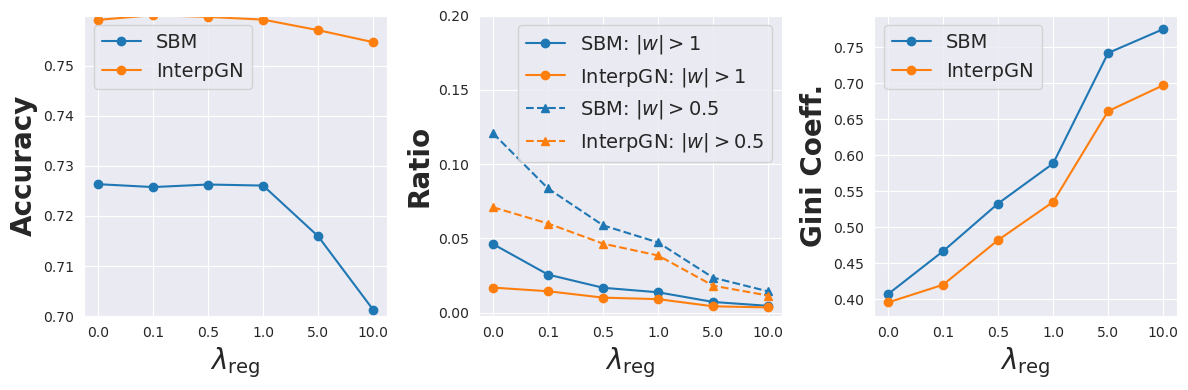

In [17]:
df1 = get_sub_df(sbm_df, lambda_div=0.1, epsilon=1, num_shapelet=10, gating_value=1.)
print(df1.shape)
df1 = df1.groupby(['lambda_reg'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df1 = df1.reset_index()
df1 = df1.sort_values(by="lambda_reg")
df1.insert(0, 'model', ['SBM'] * df1.shape[0])

df2 = get_sub_df(hybrid_df, lambda_div=0.1, epsilon=1, num_shapelet=10, gating_value=1., beta_schedule='constant')
print(df2.shape)
df2 = df2.groupby(['lambda_reg'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df2 = df2.reset_index()
df2 = df2.sort_values(by="lambda_reg")
df2.insert(0, 'model', ['InterpGN'] * df2.shape[0])

df = pd.concat([df1, df2], axis=0)


with sns.axes_style("darkgrid"):
    fig, axs = plt.subplots(1, 3, sharex=True, figsize=(12, 4))
    axs[0].plot(np.arange(df1.shape[0]), df1['test_accuracy'], marker="o", label='SBM')
    axs[0].plot(np.arange(df2.shape[0]), df2['test_accuracy'], marker="o", label='InterpGN')
    axs[0].set_xlabel("$\\lambda_{\\text{reg}}$", fontsize=20, fontweight='bold')
    axs[0].set_ylabel("Accuracy", fontsize=20, fontweight='bold') #, color='tab:blue')
    axs[0].legend(fontsize=14)
    axs[0].set_xticks(np.arange(df1.shape[0]))
    axs[0].set_xticklabels(df1['lambda_reg'])
    axs[0].set_ylim(0.7, 0.76)
    axs[0].set_yticks([0.7, 0.71, 0.72, 0.73, 0.74, 0.75])
    
    axs[1].plot(np.arange(df1.shape[0]), df1['w_mean_10'], marker="o", label='SBM: $|w|>1$', color='tab:blue')
    axs[1].plot(np.arange(df2.shape[0]), df2['w_mean_10'], marker="o", label='InterpGN: $|w|>1$', color='tab:orange')
    axs[1].plot(np.arange(df1.shape[0]), df1['w_mean_5'], marker="^", linestyle="--", label='SBM: $|w|>0.5$', color='tab:blue')
    axs[1].plot(np.arange(df2.shape[0]), df2['w_mean_5'], marker="^", linestyle="--", label='InterpGN: $|w|>0.5$', color='tab:orange')
    axs[1].set_xlabel("$\\lambda_{\\text{reg}}$", fontsize=20, fontweight='bold')
    axs[1].set_ylabel("Ratio", fontsize=20, fontweight='bold') #, color='tab:blue')
    axs[1].legend(fontsize=14)
    axs[1].set_xticks(np.arange(df1.shape[0]))
    axs[1].set_xticklabels(df1['lambda_reg'])
    axs[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2])

    c = 'w_gini_abs'
    axs[2].plot(np.arange(df1.shape[0]), df1[c], marker="o", label='SBM', color='tab:blue')
    axs[2].plot(np.arange(df2.shape[0]), df2[c], marker="o", label='InterpGN', color='tab:orange')
    axs[2].set_xlabel("$\\lambda_{\\text{reg}}$", fontsize=20, fontweight='bold')
    axs[2].set_ylabel("Gini Coeff.", fontsize=20, fontweight='bold')
    axs[2].legend(fontsize=14)
    axs[2].set_xticks(np.arange(df1.shape[0]))
    axs[2].set_xticklabels(df1['lambda_reg'])
    # axs[2].set_yticks([0.7, 0.75, 0.8, 0.85, 0.9])
plt.tight_layout()

# fig.savefig("../figures/ablation_lambda_reg.pdf")

# print(df.to_latex(index=False, float_format="%.3f"))
df

#### $\lambda_{\text{div}}$

(750, 28)
(750, 28)


,model,lambda_div,test_accuracy,shapelet_score,w_mean_10,w_mean_5,w_mean_1,eta_mean
0,SBM,0.0,0.726426,0.071970,0.025396,0.085310,0.413304,NaN
1,SBM,0.1,0.725757,0.074055,0.025593,0.083559,0.411686,NaN
2,SBM,1.0,0.725897,0.079085,0.025724,0.082760,0.417002,NaN
3,SBM,10.0,0.724840,0.088571,0.026740,0.085304,0.420085,NaN
4,SBM,100.0,0.724091,0.097080,0.028251,0.085808,0.405861,NaN
0,InterpGN,0.0,0.761732,0.062330,0.016266,0.066803,0.362293,0.450682
1,InterpGN,0.1,0.760072,0.060813,0.014405,0.059994,0.342773,0.440834
2,InterpGN,1.0,0.759906,0.064942,0.016583,0.062977,0.337838,0.442754
3,InterpGN,10.0,0.757916,0.072803,0.018249,0.063749,0.331091,0.437237
4,InterpGN,100.0,0.761505,0.081200,0.018360,0.065951,0.331325,0.436562


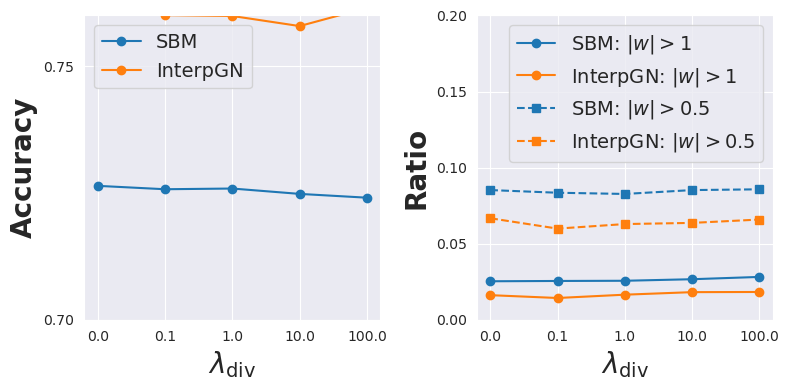

In [19]:
import seaborn as sns

df1 = get_sub_df(sbm_df, lambda_reg=0.1, epsilon=1, num_shapelet=10)
print(df1.shape)
df1 = df1.groupby(['lambda_div'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'eta_mean']].mean()
df1 = df1.reset_index()
df1 = df1.sort_values(by="lambda_div")
df1.insert(0, 'model', ['SBM'] * df1.shape[0])

df2 = get_sub_df(hybrid_df, lambda_reg=0.1, epsilon=1, num_shapelet=10, beta_schedule='constant', gating_value=1.)
print(df2.shape)
df2 = df2.groupby(['lambda_div'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'eta_mean']].mean()
df2 = df2.reset_index()
df2 = df2.sort_values(by="lambda_div")
df2.insert(0, 'model', ['InterpGN'] * df2.shape[0])

df = pd.concat([df1, df2], axis=0)


with sns.axes_style("darkgrid"):
    fig, axs = plt.subplots(1, 2, sharex=True, figsize=(8, 4))
    axs[0].plot(np.arange(df1.shape[0]), df1['test_accuracy'], marker="o", label='SBM')
    axs[0].plot(np.arange(df2.shape[0]), df2['test_accuracy'], marker="o", label='InterpGN')
    axs[0].set_xlabel("$\\lambda_{\\text{div}}$", fontsize=20, fontweight='bold')
    axs[0].set_ylabel("Accuracy", fontsize=20, fontweight='bold') #, color='tab:blue')
    axs[0].legend(fontsize=14)
    axs[0].set_xticks(np.arange(df1.shape[0]))
    axs[0].set_xticklabels(df1['lambda_div'])
    axs[0].set_ylim(0.7, 0.76)
    axs[0].set_yticks([0.7, 0.75])
    
    axs[1].plot(np.arange(df1.shape[0]), df1['w_mean_10'], marker="o", label='SBM: $|w|>1$', color='tab:blue')
    axs[1].plot(np.arange(df2.shape[0]), df2['w_mean_10'], marker="o", label='InterpGN: $|w|>1$', color='tab:orange')
    axs[1].plot(np.arange(df1.shape[0]), df1['w_mean_5'], marker="s", linestyle="--", label='SBM: $|w|>0.5$', color='tab:blue')
    axs[1].plot(np.arange(df2.shape[0]), df2['w_mean_5'], marker="s", linestyle="--", label='InterpGN: $|w|>0.5$', color='tab:orange')
    axs[1].set_xlabel("$\\lambda_{\\text{div}}$", fontsize=20, fontweight='bold')
    axs[1].set_ylabel("Ratio", fontsize=20, fontweight='bold') #, color='tab:blue')
    axs[1].legend(fontsize=14)
    axs[1].set_xticks(np.arange(df1.shape[0]))
    axs[1].set_xticklabels(df1['lambda_div'])
    axs[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.tight_layout()

# fig.savefig("../figures/ablation_lambda_div.pdf")

# print(df.to_latex(index=False, float_format="%.3f"))
df

#### Gating value

(900, 28)


,gating_value,test_accuracy,shapelet_score,w_mean_10,w_mean_5,w_mean_1,w_gini_clip,w_gini_abs,eta_mean,eta_count
0,0.5,0.756523,0.060842,0.014405,0.059994,0.342773,0.679195,0.419943,0.505555,0.417445
1,0.6,0.758609,0.060820,0.014405,0.059994,0.342773,0.679195,0.419943,0.484003,0.369977
2,0.7,0.759308,0.060811,0.014405,0.059994,0.342773,0.679195,0.419943,0.469254,0.327868
3,0.8,0.759778,0.060810,0.014405,0.059994,0.342773,0.679195,0.419943,0.457275,0.279455
4,0.9,0.760072,0.060813,0.014405,0.059994,0.342773,0.679195,0.419943,0.446992,0.209878
5,1.0,0.760072,0.060813,0.014405,0.059994,0.342773,0.679195,0.419943,0.440834,0.000165


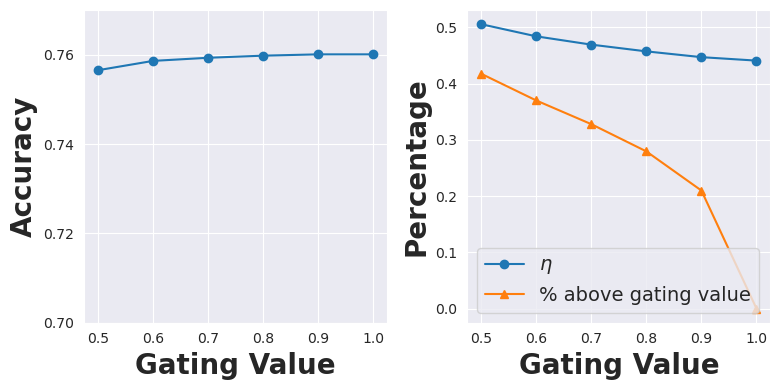

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = get_sub_df(hybrid_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1., num_shapelet=10, beta_schedule='constant')
print(df1.shape)
df1 = df1.groupby(['gating_value'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean', 'eta_count']].mean()
df1 = df1.reset_index()

with sns.axes_style("darkgrid"):
    fig, axs = plt.subplots(1, 2, sharex=True, figsize=(8, 4))
    
    # Plot test accuracy
    axs[0].plot(df1['gating_value'], df1['test_accuracy'], marker="o")
    
    axs[0].set_xlabel("Gating Value", fontsize=20, fontweight='bold')
    axs[0].set_ylabel("Accuracy", fontsize=20, fontweight='bold')
    # axs[0].legend(fontsize=14)
    axs[0].set_ylim(0.70, 0.77)
    axs[0].set_yticks([0.70, 0.72, 0.74, 0.76])
    
    # Plot eta_mean
    axs[1].plot(df1['gating_value'], df1['eta_mean'], marker="o", label="$\\eta$")
    axs[1].set_xlabel("Gating Value", fontsize=20, fontweight='bold')
    # axs[1].set_ylabel("$\\eta$", fontsize=20, fontweight='bold')

    axs[1].plot(df1['gating_value'], df1['eta_count'], marker="^", label="% above gating value")
    # axs[1].set_xlabel("Gating Value", fontsize=20, fontweight='bold')
    # axs[1].set_ylabel("$\\eta$", fontsize=20, fontweight='bold')
    axs[1].set_ylabel("Percentage", fontsize=20, fontweight='bold')
    axs[1].legend(fontsize=14)
    # axs[1].legend(fontsize=14)
    # axs[1].set_yticks([0.5, 0.55, 0.6, 0.65])
plt.tight_layout()

# fig.savefig("../figures/ablation_gating_value.pdf")

df1


#### RBF v.s. Linear

In [23]:
import glob

root = "../../../Desktop/iclr/result"
dfs = []
for f in sorted(glob.glob(f"{root}/SBM/*.csv")):
    df = pd.read_csv(f)
    dfs.append(df)

sbm_df = pd.concat(dfs, axis=0)


dfs = []
for f in sorted(glob.glob(f"{root}/LTS/*.csv")):
    df = pd.read_csv(f)
    dfs.append(df)

lts_df = pd.concat(dfs, axis=0)

sbm_df.shape, lts_df.shape, sbm_df.columns

((4200, 28),
 (280, 28),
 Index(['model', 'dnn_type', 'dataset', 'lambda_reg', 'lambda_div', 'epsilon',
        'num_shapelet', 'gating_value', 'pos_weight', 'beta_schedule', 'lr',
        'train_epochs', 'seed', 'test_accuracy', 'epoch_stop', 'eta_mean',
        'eta_std', 'eta_count', 'shapelet_score', 'w_sum_10', 'w_mean_10',
        'w_sum_5', 'w_mean_5', 'w_sum_1', 'w_mean_1', 'w_max', 'w_gini_clip',
        'w_gini_abs'],
       dtype='object'))

In [25]:
lts_datasets = lts_df['dataset'].unique()
sbm_df = sbm_df[sbm_df['dataset'].isin(lts_datasets)]

In [26]:
df1 = get_sub_df(sbm_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1.)
print(df1.shape)
df1 = df1.groupby(['num_shapelet'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1']].mean()
df1 = df1.reset_index()
df1.insert(0, 'model', ['SBM'] * df1.shape[0])

df2 = get_sub_df(lts_df, lambda_reg=0.1, lambda_div=0.1, epsilon=1.)
print(df2.shape)
df2 = df2.groupby(['num_shapelet'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1']].mean()
df2 = df2.reset_index()
df2.insert(0, 'model', ['LTS'] * df2.shape[0])

df = pd.concat([df1, df2], axis=0)
print(df.to_latex(index=False, float_format="%.3f"))


(280, 28)
(280, 28)
\begin{tabular}{lrrrrrr}
\toprule
model & num_shapelet & test_accuracy & shapelet_score & w_mean_10 & w_mean_5 & w_mean_1 \\
\midrule
SBM & 5 & 0.728 & 0.101 & 0.051 & 0.141 & 0.513 \\
SBM & 10 & 0.734 & 0.073 & 0.027 & 0.083 & 0.405 \\
LTS & 5 & 0.718 & 0.171 & 0.084 & 0.181 & 0.499 \\
LTS & 10 & 0.722 & 0.121 & 0.054 & 0.125 & 0.433 \\
\bottomrule
\end{tabular}



#### DNN Architecture in InterpGN

In [31]:
import pandas as pd
import glob
root = "../../../Desktop/iclr/add/result_dnn_type"

dfs = []
for f in sorted(glob.glob(f"{root}/InterpGN/*.csv")):
    df = pd.read_csv(f)
    dfs.append(df)

hybrid_df = pd.concat(dfs, axis=0)
hybrid_df.shape

(200, 28)

In [32]:
df = hybrid_df.groupby(['dataset', 'dnn_type'])[['test_accuracy', 'shapelet_score', 'w_mean_10', 'w_mean_5', 'w_mean_1', 'w_gini_clip', 'w_gini_abs', 'eta_mean']].mean()
df = df.reset_index()
accu_df = df[['dataset', 'dnn_type', 'test_accuracy']]
eta_df = df[['dataset', 'dnn_type', 'eta_mean']]

# Pivot the accuracy dataframe to have datasets as rows and dnn_types as columns
accu_pivot = accu_df.pivot(index='dataset', columns='dnn_type', values='test_accuracy')
accu_pivot = accu_pivot.round(3)
accu_pivot = accu_pivot[['FCN', 'Transformer', 'PatchTST', 'TimesNet']]

# Pivot the eta dataframe to have datasets as rows and dnn_types as columns
eta_pivot = eta_df.pivot(index='dataset', columns='dnn_type', values='eta_mean')
eta_pivot = eta_pivot.round(3)
eta_pivot = eta_pivot[['FCN', 'Transformer', 'PatchTST', 'TimesNet']]

# Create empty list to store combined columns
combined_cols = []

# Get all columns from accuracy pivot
accu_cols = accu_pivot.columns

# For each accuracy column, add it and corresponding eta column
for col in accu_cols:
    combined_cols.append(('Accuracy', col))
    combined_cols.append(('Eta', col))
    
# Create MultiIndex from combined columns    
cols = pd.MultiIndex.from_tuples(combined_cols)

# Create empty DataFrame with MultiIndex columns
combined_df = pd.DataFrame(index=accu_pivot.index, columns=cols)

# Fill in values
for col in accu_cols:
    combined_df[('Accuracy', col)] = accu_pivot[col]
    combined_df[('Eta', col)] = eta_pivot[col]

print(combined_df.to_latex(float_format=lambda x: f"{x:.3f}"))
combined_df



\begin{tabular}{lrrrrrrrr}
\toprule
 & Accuracy & Eta & Accuracy & Eta & Accuracy & Eta & Accuracy & Eta \\
 & FCN & FCN & Transformer & Transformer & PatchTST & PatchTST & TimesNet & TimesNet \\
dataset &  &  &  &  &  &  &  &  \\
\midrule
EthanolConcentration & 0.298 & 0.008 & 0.320 & 0.236 & 0.276 & 0.833 & 0.302 & 0.401 \\
FaceDetection & 0.663 & 0.709 & 0.657 & 0.568 & 0.652 & 0.756 & 0.670 & 0.517 \\
Handwriting & 0.612 & 0.022 & 0.127 & 0.545 & 0.115 & 0.266 & 0.214 & 0.024 \\
Heartbeat & 0.779 & 0.246 & 0.735 & 0.671 & 0.729 & 0.954 & 0.740 & 0.576 \\
JapaneseVowels & 0.991 & 0.758 & 0.970 & 0.920 & 0.919 & 0.871 & 0.974 & 0.831 \\
PEMS-SF & 0.861 & 0.480 & 0.800 & 0.671 & 0.206 & 0.980 & 0.834 & 0.560 \\
SelfRegulationSCP1 & 0.917 & 0.428 & 0.878 & 0.448 & 0.851 & 0.407 & 0.902 & 0.437 \\
SelfRegulationSCP2 & 0.580 & 0.036 & 0.559 & 0.700 & 0.576 & 0.587 & 0.578 & 0.363 \\
SpokenArabicDigits & 0.998 & 0.959 & 0.993 & 0.984 & 0.991 & 0.985 & 0.992 & 0.969 \\
UWaveGestureLibrary 

,Accuracy,Eta,Accuracy,Eta,Accuracy,Eta,Accuracy,Eta
,FCN,FCN,Transformer,Transformer,PatchTST,PatchTST,TimesNet,TimesNet
dataset,,,,,,,,
EthanolConcentration,0.298,0.008,0.320,0.236,0.276,0.833,0.302,0.401
FaceDetection,0.663,0.709,0.657,0.568,0.652,0.756,0.670,0.517
Handwriting,0.612,0.022,0.127,0.545,0.115,0.266,0.214,0.024
Heartbeat,0.779,0.246,0.735,0.671,0.729,0.954,0.740,0.576
JapaneseVowels,0.991,0.758,0.970,0.920,0.919,0.871,0.974,0.831
PEMS-SF,0.861,0.480,0.800,0.671,0.206,0.980,0.834,0.560
SelfRegulationSCP1,0.917,0.428,0.878,0.448,0.851,0.407,0.902,0.437
SelfRegulationSCP2,0.580,0.036,0.559,0.700,0.576,0.587,0.578,0.363
